   step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PAYMENT   9839.64  C1231006815       170136.0       160296.36   
1     1   PAYMENT   1864.28  C1666544295        21249.0        19384.72   
2     1  TRANSFER    181.00  C1305486145          181.0            0.00   
3     1  CASH_OUT    181.00   C840083671          181.0            0.00   
4     1   PAYMENT  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  
0  M1979787155             0.0             0.0        0  
1  M2044282225             0.0             0.0        0  
2   C553264065             0.0             0.0        1  
3    C38997010         21182.0             0.0        1  
4  M1230701703             0.0             0.0        0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 10 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 

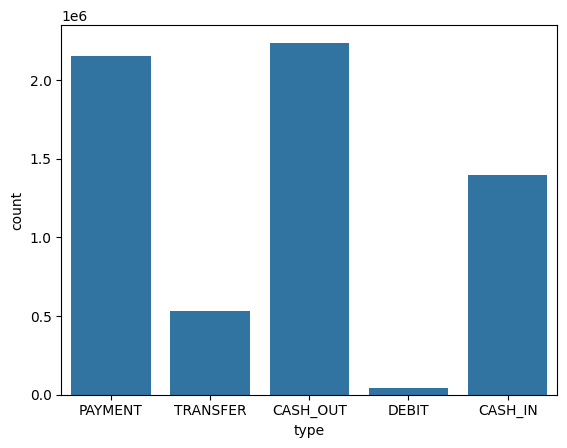

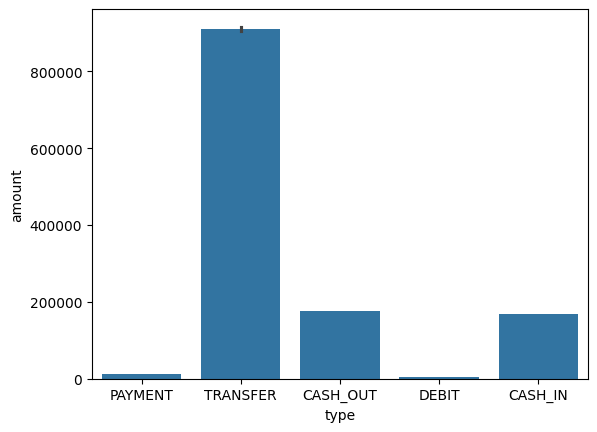

isFraud
0    6354407
1       8213
Name: count, dtype: int64


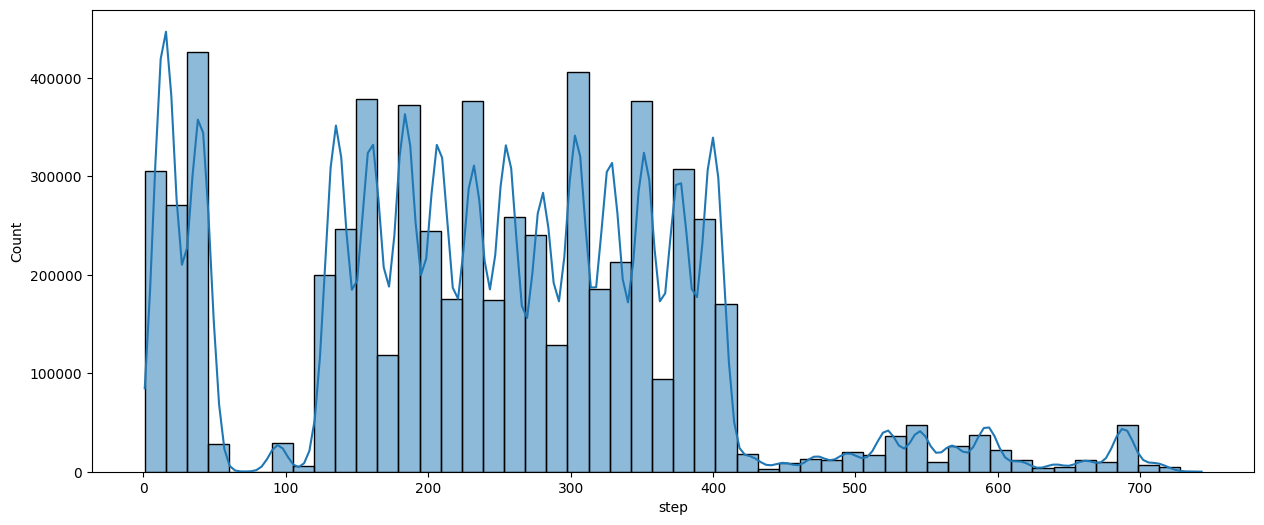

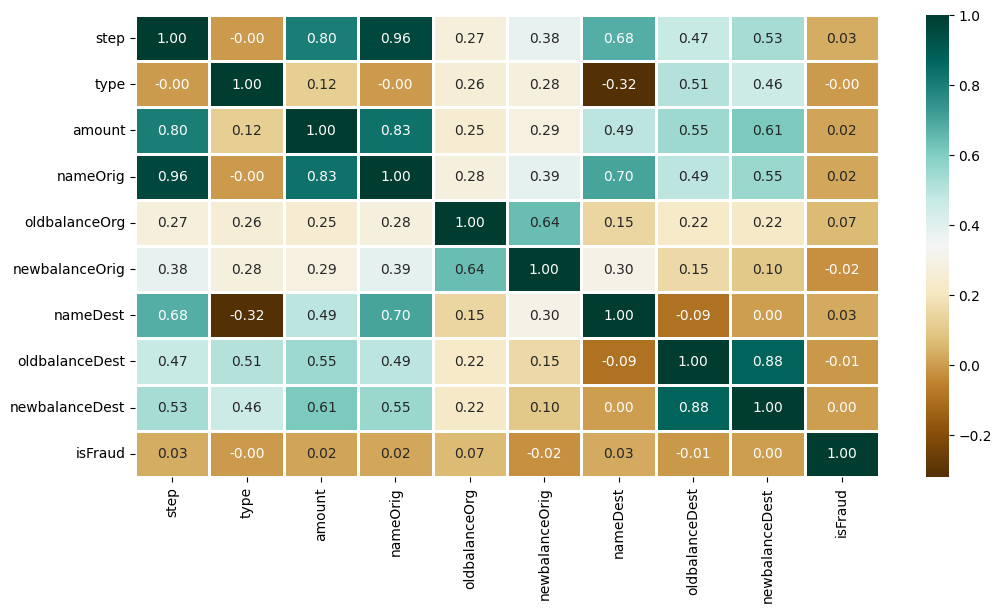

(6362620, 10) (6362620,)


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
try:
    data = pd.read_csv('C:/Users/Anshita/Downloads/ML_Project/datasets/new_file.csv')
except FileNotFoundError:
    print("Error: 'new_file.csv' not found. Please check the file path.")
    exit()

# Basic data overview
if data.empty:
    print("Error: The dataset is empty.")
    exit()

print(data.head())
print(data.info())
print(data.describe())

# Check for required columns
required_columns = ['type', 'amount', 'isFraud', 'nameOrig', 'nameDest', 'step']
missing_columns = [col for col in required_columns if col not in data.columns]
if missing_columns:
    print(f"Error: Missing columns in the dataset: {missing_columns}")
    exit()

# Feature categorization
obj = (data.dtypes == 'object')
object_cols = list(obj[obj].index)
print("Categorical variables:", len(object_cols))

int_ = (data.dtypes == 'int')
num_cols = list(int_[int_].index)
print("Integer variables:", len(num_cols))

fl = (data.dtypes == 'float')
fl_cols = list(fl[fl].index)
print("Float variables:", len(fl_cols))

# Data visualization
sns.countplot(x='type', data=data)
plt.show()

sns.barplot(x='type', y='amount', data=data)
plt.show()

print(data['isFraud'].value_counts())

plt.figure(figsize=(15, 6))
sns.histplot(data['step'], bins=50, kde=True)
plt.show()

plt.figure(figsize=(12, 6))
try:
    sns.heatmap(data.apply(lambda x: pd.factorize(x)[0]).corr(),
                cmap='BrBG',
                fmt='.2f',
                linewidths=2,
                annot=True)
    plt.show()
except ValueError as e:
    print(f"Error in heatmap generation: {e}")

# Encoding categorical features
if 'type' in data.columns:
    type_new = pd.get_dummies(data['type'], drop_first=True)
    data_new = pd.concat([data, type_new], axis=1)
else:
    print("Error: 'type' column is missing.")
    exit()

# Feature and target separation
try:
    X = data_new.drop(['isFraud', 'type', 'nameOrig', 'nameDest'], axis=1)
    y = data_new['isFraud']
except KeyError as e:
    print(f"Error in feature/target separation: {e}")
    exit()

print(X.shape, y.shape)

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score as ras, ConfusionMatrixDisplay

model = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=7)
model.fit(X_train, y_train)

# Evaluation
train_preds = model.predict_proba(X_train)[:, 1]
print('Training ROC-AUC Score:', ras(y_train, train_preds))

test_preds = model.predict_proba(X_test)[:, 1]
print('Validation ROC-AUC Score:', ras(y_test, test_preds))

# Confusion Matrix
cm = ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)
cm.plot(cmap='Blues')
plt.show()

First 5 rows of the dataset:
   step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PAYMENT   9839.64  C1231006815       170136.0       160296.36   
1     1   PAYMENT   1864.28  C1666544295        21249.0        19384.72   
2     1  TRANSFER    181.00  C1305486145          181.0            0.00   
3     1  CASH_OUT    181.00   C840083671          181.0            0.00   
4     1   PAYMENT  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  
0  M1979787155             0.0             0.0        0  
1  M2044282225             0.0             0.0        0  
2   C553264065             0.0             0.0        1  
3    C38997010         21182.0             0.0        1  
4  M1230701703             0.0             0.0        0  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 10 columns):
 #   Column          Dtype  
---  ------    

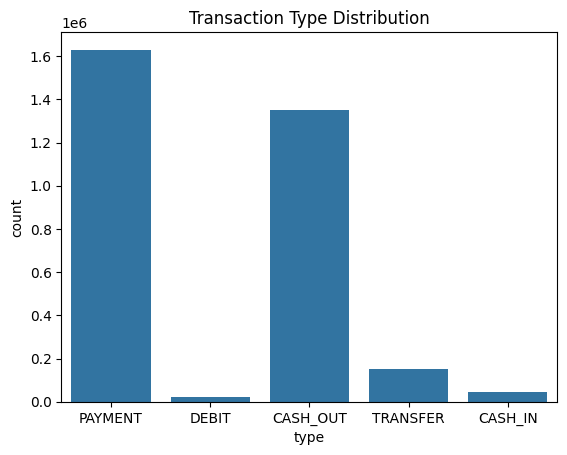


Visualizing the 'amount' by 'type'...


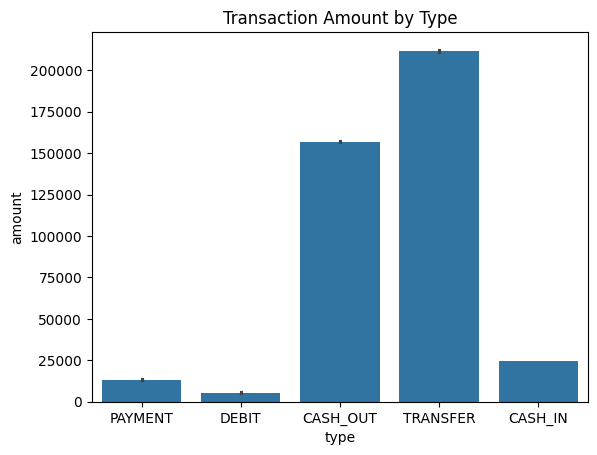


Visualizing the 'step' distribution...


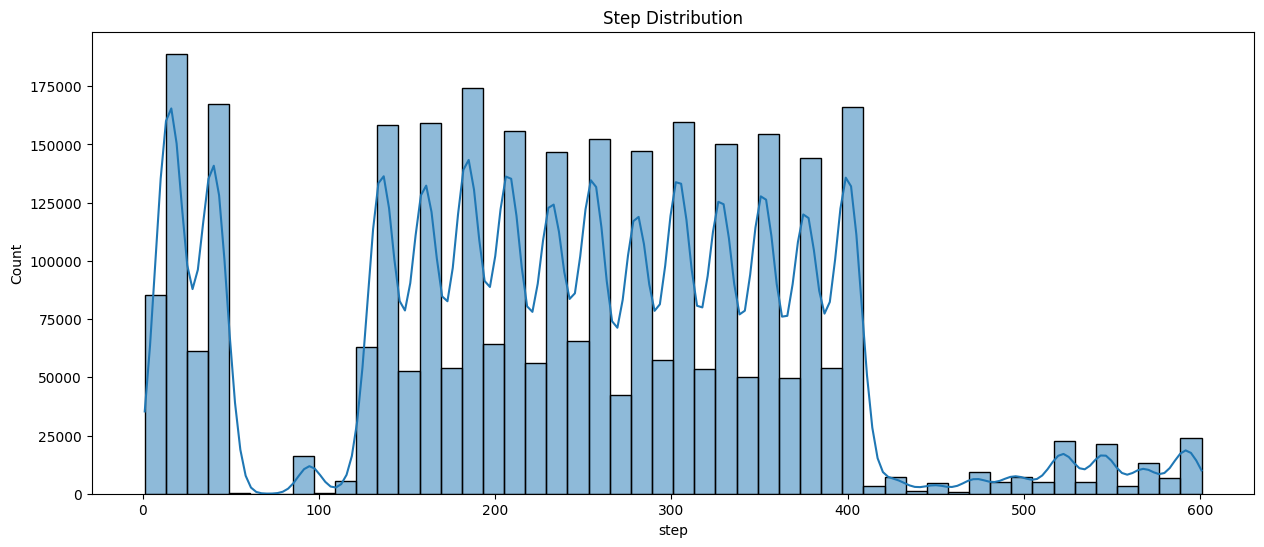


Visualizing the correlation heatmap...


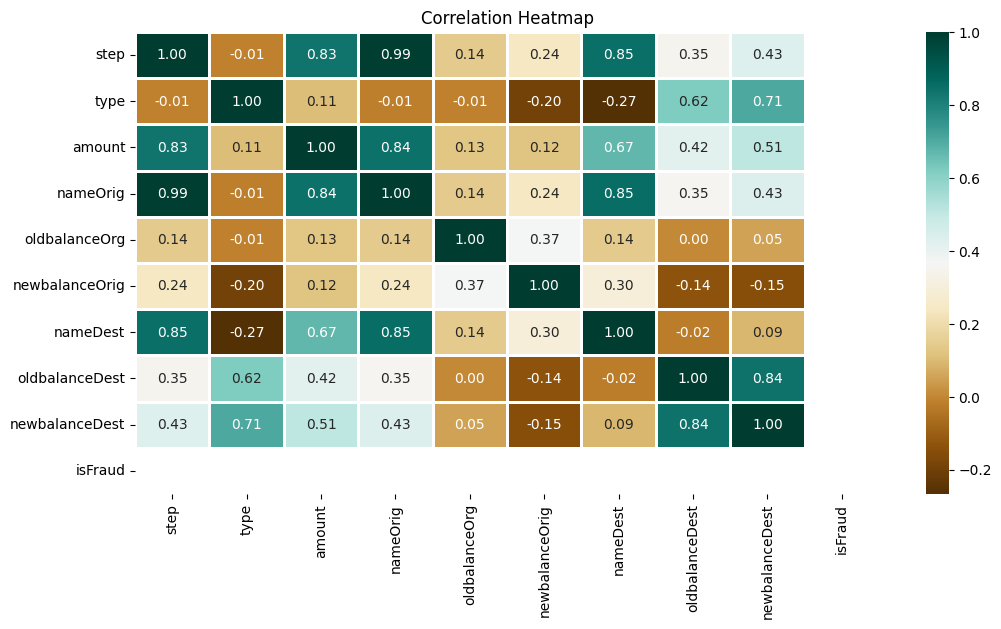


Encoding categorical features...
Categorical encoding completed.

Removing irrelevant columns...
Columns removed: ['nameOrig', 'nameDest']

Scaling numeric features...
Feature scaling completed.

Separating features and target...
Feature and target separation completed.
Features shape: (3196840, 10), Target shape: (3196840,)

Splitting data into training and testing sets...
Data split completed.

Training Random Forest Classifier...
Model training completed.
Class distribution in y_train:
isFraud
0.0    2237788
Name: count, dtype: int64

Class distribution in y_test:
isFraud
0.0    959052
Name: count, dtype: int64

Evaluating the model...
Training ROC-AUC Score cannot be calculated (single class in y_train).
Validation ROC-AUC Score cannot be calculated (single class in y_test).
Accuracy: 1.0
Precision: 0.0


c:\Users\Anshita\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Anshita\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Recall: 0.0
F1 Score: 0.0

Generating confusion matrix...


c:\Users\Anshita\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Anshita\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


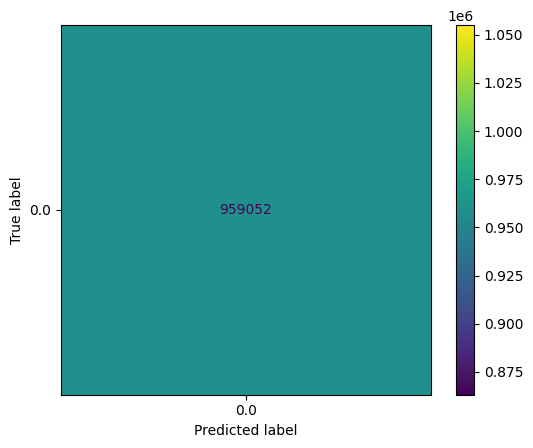

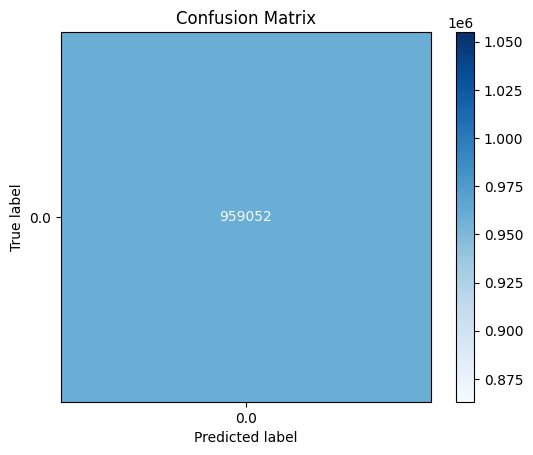

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score as ras, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score

# Load the dataset
try:
    data = pd.read_csv('C:/Users/Anshita/Downloads/ML_Project/datasets/new_file.csv')
except FileNotFoundError:
    print("Error: 'new_file.csv' not found. Please check the file path.")
    exit()

# Basic data overview
if data.empty:
    print("Error: The dataset is empty.")
    exit()

print("First 5 rows of the dataset:")
print(data.head())
print("\nDataset Info:")
print(data.info())
print("\nDataset Description:")
print(data.describe())

# Check for required columns
required_columns = ['type', 'amount', 'isFraud', 'nameOrig', 'nameDest', 'step']
missing_columns = [col for col in required_columns if col not in data.columns]
if missing_columns:
    print(f"Error: Missing columns in the dataset: {missing_columns}")
    exit()

# Handle missing values
print("\nChecking for missing values...")
print(data.isnull().sum())
if data.isnull().sum().sum() > 0:
    print("Handling missing values by dropping rows with missing data.")
    data = data.dropna()
else:
    print("No missing values found.")

# Remove duplicates
print("\nChecking for duplicate rows...")
print(f"Number of duplicate rows: {data.duplicated().sum()}")
if data.duplicated().sum() > 0:
    print("Removing duplicate rows.")
    data = data.drop_duplicates()
else:
    print("No duplicate rows found.")

# Outlier treatment using the IQR method
print("\nHandling outliers using the IQR method...")
numeric_cols = data.select_dtypes(include=[np.number]).columns
for col in numeric_cols:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
    print(f"Column '{col}': {len(outliers)} outliers found.")
    data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]

# Data visualization
print("\nVisualizing the 'type' column distribution...")
sns.countplot(x='type', data=data)
plt.title("Transaction Type Distribution")
plt.show()

print("\nVisualizing the 'amount' by 'type'...")
sns.barplot(x='type', y='amount', data=data)
plt.title("Transaction Amount by Type")
plt.show()

print("\nVisualizing the 'step' distribution...")
plt.figure(figsize=(15, 6))
sns.histplot(data['step'], bins=50, kde=True)
plt.title("Step Distribution")
plt.show()

print("\nVisualizing the correlation heatmap...")
plt.figure(figsize=(12, 6))
try:
    sns.heatmap(data.apply(lambda x: pd.factorize(x)[0]).corr(),
                cmap='BrBG',
                fmt='.2f',
                linewidths=2,
                annot=True)
    plt.title("Correlation Heatmap")
    plt.show()
except ValueError as e:
    print(f"Error in heatmap generation: {e}")

# Encoding categorical features
print("\nEncoding categorical features...")
if 'type' in data.columns:
    type_new = pd.get_dummies(data['type'], drop_first=True)
    data = pd.concat([data, type_new], axis=1)
    print("Categorical encoding completed.")
else:
    print("Error: 'type' column is missing.")
    exit()

# Remove irrelevant columns
print("\nRemoving irrelevant columns...")
irrelevant_columns = ['nameOrig', 'nameDest']
data = data.drop(columns=irrelevant_columns, errors='ignore')
print(f"Columns removed: {irrelevant_columns}")

# Feature scaling
print("\nScaling numeric features...")
scaler = StandardScaler()
numeric_cols = data.select_dtypes(include=[np.number]).columns
data[numeric_cols] = scaler.fit_transform(data[numeric_cols])
print("Feature scaling completed.")

# Feature and target separation
print("\nSeparating features and target...")
try:
    X = data.drop(['isFraud', 'type'], axis=1)  # Exclude 'type' from features
    y = data['isFraud']
    print("Feature and target separation completed.")
except KeyError as e:
    print(f"Error in feature/target separation: {e}")
    exit()

print(f"Features shape: {X.shape}, Target shape: {y.shape}")

# Train-test split
print("\nSplitting data into training and testing sets...")
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)
print("Data split completed.")

# Random Forest Classifier
print("\nTraining Random Forest Classifier...")
model = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=7)
model.fit(X_train, y_train)
print("Model training completed.")

# Check class distribution in the training and testing sets
print("Class distribution in y_train:")
print(y_train.value_counts())

print("\nClass distribution in y_test:")
print(y_test.value_counts())

# Evaluation
print("\nEvaluating the model...")

if len(np.unique(y_train)) > 1:
    train_preds = model.predict_proba(X_train)[:, 1]
    print('Training ROC-AUC Score:', ras(y_train, train_preds))
else:
    print("Training ROC-AUC Score cannot be calculated (single class in y_train).")

if len(np.unique(y_test)) > 1:
    test_preds = model.predict_proba(X_test)[:, 1]
    print('Validation ROC-AUC Score:', ras(y_test, test_preds))
else:
    print("Validation ROC-AUC Score cannot be calculated (single class in y_test).")

# Additional Metrics
test_preds_class = model.predict(X_test)
print('Accuracy:', accuracy_score(y_test, test_preds_class))
print('Precision:', precision_score(y_test, test_preds_class))
print('Recall:', recall_score(y_test, test_preds_class))
print('F1 Score:', f1_score(y_test, test_preds_class))

# Confusion Matrix
print("\nGenerating confusion matrix...")
cm = ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)
cm.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()